# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [7]:
print('Average age of:')
print('Any Titanic passenger: %f' % df['Age'].mean())
survivors = df[df['Survived'] == 1]
print('A survivor: %f' % survivors['Age'].mean())
nonsurvivors = df[df['Survived'] == 0]
ns_firstclass = nonsurvivors[nonsurvivors['Pclass'] == 1]
print('A non-surviving first-class passenger: %f' % ns_firstclass['Age'].mean())
male_surv = survivors[survivors['Sex'] == 'male']
male_surv_30plus = male_surv[male_surv['Age'] > 30]
male_surv_30plus_notQ = male_surv_30plus[male_surv_30plus['Embarked'] != 'Q']
print('Male survivors older than 30 from anywhere but Queenstown: %f' % male_surv_30plus_notQ['Age'].mean())

Average age of:
Any Titanic passenger: 29.699118
A survivor: 28.343690
A non-surviving first-class passenger: 43.695312
Male survivors older than 30 from anywhere but Queenstown: 41.487805


**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [8]:
Tit_med = df['Age'].median()
print('Median age of all passengers: %f' % Tit_med)
print('-------------------------')
print('Years from median:')
print('Any Titanic passenger: %f' % (df['Age'].mean() - Tit_med))
print('A survivor: %f' % (survivors['Age'].mean() - Tit_med))
print('A non-surviving first-class passenger: %f' % (ns_firstclass['Age'].mean() - Tit_med))
print('Male survivors older than 30 from anywhere but Queenstown: %f' %\
      (male_surv_30plus_notQ['Age'].mean() - Tit_med))

Median age of all passengers: 28.000000
-------------------------
Years from median:
Any Titanic passenger: 1.699118
A survivor: 0.343690
A non-surviving first-class passenger: 15.695312
Male survivors older than 30 from anywhere but Queenstown: 13.487805


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
survivors['SibSp'].value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df['Fare'].median()

14.4542

In [14]:
five_num = [df['Fare'].quantile(0),   
            df['Fare'].quantile(0.25),
            df['Fare'].quantile(0.50),
            df['Fare'].quantile(0.75),
            df['Fare'].quantile(1)]

five_num

[0.0, 7.9104, 14.4542, 31.0, 512.3292]

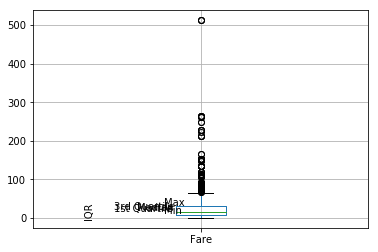

In [15]:
df.boxplot(column="Fare",
               figsize=(8,8))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.81, y=18.75, s="Median")
plt.text(x=0.74, y=15.5, s="1st Quartile")
plt.text(x=0.89, y=10.2, s="Min")
plt.text(x=0.89, y=32, s="Max")
plt.text(x=0.65, y=20, s="IQR", rotation=90, size=10)

**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [16]:
df['Fare'].quantile(0.9) - df['Fare'].quantile(0.05)

70.7333

In [17]:
df[df['Fare'] == df['Fare'].quantile(0.9)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S


In [18]:
df[df['Fare'] == df['Fare'].quantile(0.05)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.225,NaN,C
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.225,NaN,C
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.225,NaN,C
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.225,NaN,C
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.225,NaN,C
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.225,NaN,C
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.225,NaN,C
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.225,NaN,C


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [19]:
df[df['Embarked'] == 'C'].mean()

PassengerId    445.357143
Survived         0.553571
Pclass           1.886905
Age             30.814769
SibSp            0.386905
Parch            0.363095
Fare            59.954144
dtype: float64

In [20]:
df[df['Embarked'] == 'Q'].mean()

PassengerId    417.896104
Survived         0.389610
Pclass           2.909091
Age             28.089286
SibSp            0.428571
Parch            0.168831
Fare            13.276030
dtype: float64

In [21]:
df[df['Embarked'] == 'S'].mean()

PassengerId    449.527950
Survived         0.336957
Pclass           2.350932
Age             29.445397
SibSp            0.571429
Parch            0.413043
Fare            27.079812
dtype: float64

**What is the most common passenger class for each port?**

In [22]:
cherbourg = df[df['Embarked'] == 'C']
cherbourg['Pclass'].value_counts()

1    85
3    66
2    17
Name: Pclass, dtype: int64

In [23]:
queenstown = df[df['Embarked'] == 'Q']
queenstown['Pclass'].value_counts()

3    72
2     3
1     2
Name: Pclass, dtype: int64

In [24]:
southampton = df[df['Embarked'] == 'S']
southampton['Pclass'].value_counts()

3    353
2    164
1    127
Name: Pclass, dtype: int64

**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [25]:
male_surv_1st = male_surv[male_surv['Pclass'] == 1]
len(male_surv_1st[male_surv_1st['Fare'] < (df['Fare'].median() * 2)])/len(male_surv_1st)

0.24444444444444444

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [30]:
nonsurv_nofam = nonsurvivors[nonsurvivors['SibSp'] == 0]
survivors_wfam = survivors[survivors['SibSp'] != 0]
print('%f years younger' % (survivors_wfam['Age'].mean() - nonsurv_nofam['Age'].mean()))

-5.686756 years younger


**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

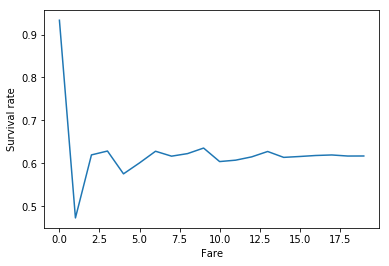

In [63]:
rate_list = []
j = 0

for i in range(20):
    q = len(survivors[survivors['Fare'] <= survivors['Fare'].quantile(j)])
    p = len(df[df['Fare'] <= df['Fare'].quantile(j)])
    diff = p - q
    rate = (diff/p if p!=0 else 0.0) 
    rate_list.append(rate)
    j = (i+1) * 0.05

plt.plot(rate_list)
plt.ylabel('Survival rate')
plt.xlabel('Fare')
plt.show()

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [32]:
med_age = df['Age'].median()
med_fare = df['Fare'].median()
med_sibSp = df['SibSp'].median()
med_parch = df['Parch'].median()

**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [104]:
surv_ages = survivors['Age'].dropna(axis=0, how='all')
nonsurv_ages = nonsurvivors['Age'].dropna(axis=0, how='all')

**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

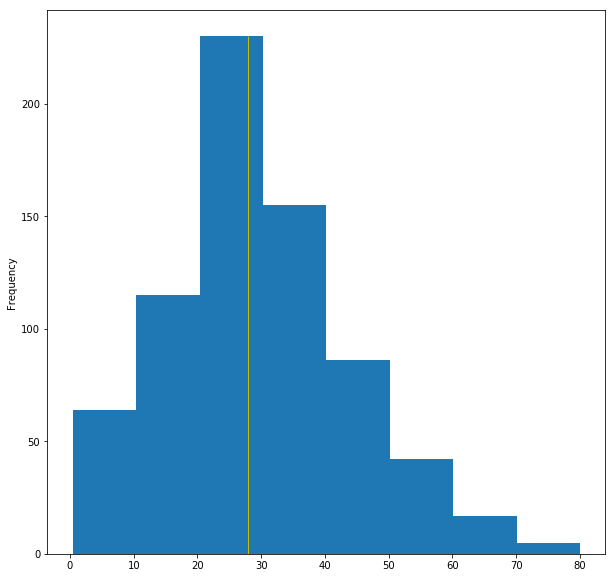

In [103]:
all_ages = df['Age'].dropna(axis=0, how='all')
all_ages.plot(kind='hist', bins=8, figsize=(10, 10))
plt.vlines(med_age, ymin=0, ymax=230, linewidth=1.0, color="y")

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

**What’s the probability that at least 42 of those 100 passengers survive?**

**Write a function that takes N random samples of 100 passengers, and returns the fraction of those samples where at least 42 passengers survive.**

Choose a random seed and find approximately how many random samples you need to take before your fraction matches the probability you calculated (within Δp≈0.05Δp≈0.05).

It may help to visualize the survival fraction vs the number of random samples. Answers will vary based on the seed.

**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

**Accompany your p-values with histograms showing the distributions of both compared populations.**

**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**

**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**